In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import random as rd
import collections as clt

In [2]:
import module
import importlib
importlib.reload(module)

<module 'module' from 'C:\\Users\\Admin\\Documents\\Anaconda\\Project4-EdgeEval\\module.py'>

In [3]:
browser = 'firefox'

In [4]:
train_data, train_index, test_data, test_index = module.load_data('F:/data_' + browser + '/3_data/data.csv')
model = load_model('F:/data_' + browser + '/4_result/model_cnn.h5')

data shape: (10000, 1002)
train data shape: (8000, 500)
test data shape: (2000, 500)


In [5]:
s_list = [500, 1000, 1514]
p_list = np.linspace(0, 100, 21)

random_data = np.array([])

for s in range(3):
    for p in range(21):
        output_data = module.random_defense(test_data, p_list[p], s_list[s])
        if len(random_data) == 0:
            random_data = output_data
        else:
            random_data = np.append(random_data, output_data, axis=0)

In [6]:
random_data.shape

(126000, 1000)

In [7]:
#random defense evaluate
random_result = np.zeros((3, 21))
for i in range(3):
    for j in range(21):
        test_data_single = random_data[(i * 21 + j) * 2000 : (i * 21 + j) * 2000 + 2000]
        result_single = module.evaluate(model, test_data_single, test_index)
        random_result[i][j] = result_single[1]

63/63 [==============================] - 3s 51ms/step - loss: 22.4294 - accuracy: 0.0185


In [8]:
filter_data = module.filter_attack(random_data, train_data)

In [9]:
filter_result = np.zeros((3, 21))
for i in range(3):
    for j in range(21):
        test_data_single = filter_data[(i * 21 + j) * 2000 : (i * 21 + j) * 2000 + 2000]
        result_single = module.evaluate(model, test_data_single, test_index)
        filter_result[i][j] = result_single[1]

63/63 [==============================] - 3s 41ms/step - loss: 7.4045 - accuracy: 0.2005


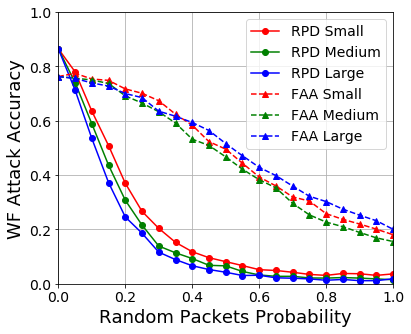

In [10]:
plt.figure(figsize=(6,5))
plt.plot(p_list/100, random_result[0], 'ro-')
plt.plot(p_list/100, random_result[1], 'go-')
plt.plot(p_list/100, random_result[2], 'bo-')

plt.plot(p_list/100, filter_result[0], 'r^--')
plt.plot(p_list/100, filter_result[1], 'g^--')
plt.plot(p_list/100, filter_result[2], 'b^--')


plt.xlabel('Random Packets Probability', fontsize=18)
plt.ylabel('WF Attack Accuracy', fontsize=18)
plt.legend(['RPD Small', 'RPD Medium', 'RPD Large', 'FAA Small', 'FAA Medium', 'FAA Large'], fontsize=14)
plt.xlim((0,1))
plt.ylim((0,1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('C:/Users/Admin/Desktop/random_filter_' + browser + '.pdf', bbox_inches = 'tight')

In [11]:
print(np.average(random_result[0]))
print(np.average(random_result[1]))
print(np.average(random_result[2]))
print(np.average(filter_result[0]))
print(np.average(filter_result[1]))
print(np.average(filter_result[2]))

0.2140714263632184
0.18507142715333474
0.16557142981106326
0.489214287627311
0.46440476179122925
0.5016904778423763
